# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [3]:
lat_lngs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")
city_counter = 0
city_stat = []
for locations in cities:
    city_counter += 1
    city_url = url + "&q=" + locations 
    print("Processing record set", city_counter, "of", len(cities), "with the city named", locations,)
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_stat.append({"City":locations, "Latitude": city_lat, "Longitude": city_lng, 
                          "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Clouds": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
    except:
        print("Error, city not found")
        pass


Beginning Data Retrieval
-----------------------------
Processing record set 1 of 597 with the city named qaanaaq
Processing record set 2 of 597 with the city named hilo
Processing record set 3 of 597 with the city named anuradhapura
Processing record set 4 of 597 with the city named plettenberg bay
Processing record set 5 of 597 with the city named punta arenas
Processing record set 6 of 597 with the city named bajo baudo
Error, city not found
Processing record set 7 of 597 with the city named helena
Processing record set 8 of 597 with the city named sistranda
Processing record set 9 of 597 with the city named glenluce
Processing record set 10 of 597 with the city named rikitea
Processing record set 11 of 597 with the city named sibolga
Processing record set 12 of 597 with the city named mayo
Processing record set 13 of 597 with the city named yellowknife
Processing record set 14 of 597 with the city named lebu
Processing record set 15 of 597 with the city named burica
Error, city not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_stat
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd


,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,qaanaaq,77.4840,-69.3632,49.15,47,100,6.13,GL,1624481597
1,hilo,19.7297,-155.0900,88.29,79,28,3.00,US,1624481597
2,anuradhapura,8.3565,80.4173,77.02,80,61,13.13,LK,1624481598
3,plettenberg bay,-34.0527,23.3716,56.19,83,100,7.18,ZA,1624481598
4,punta arenas,-53.1500,-70.9167,41.02,93,90,6.91,CL,1624481353
...,...,...,...,...,...,...,...,...,...
540,la rioja,42.2500,-2.5000,53.38,93,82,3.31,ES,1624481806
541,bloemfontein,-29.1211,26.2140,51.28,50,100,5.75,ZA,1624481806
542,koumac,-20.5667,164.2833,68.65,66,2,9.37,NC,1624481806
543,saint-augustin,51.2260,-58.6502,59.38,87,100,11.41,CA,1624481807


In [7]:

# weather_df = pd.DataFrame({
#     "City":len(location_name),
#     "Country":len(location_country),
#     "Date":len(date),
#     "Latitude":len(latitude),
#     "Longitude":len(longitude),
#     "Max Temp(f)":len([city_max_temp]),
#     "Humidity":len([city_humidity]),
#     "Wind Speed":len([city_wind]),
#     "Cloudiness":len([city_clouds]),
# weather_df

        
       # city_lat = city_weather["coord"]["lat"]
       # city_lng = city_weather["coord"]["lon"]
       # city_max_temp = city_weather["main"]["temp_max"]
       # city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd.count()

    

City               545
Latitude           545
Longitude          545
Max Temperature    545
Humidity           545
Clouds             545
Wind               545
Country            545
Date               545
dtype: int64

In [8]:
city_stat_pd.to_csv(output_data_file)
city_stat_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,qaanaaq,77.4840,-69.3632,49.15,47,100,6.13,GL,1624481597
1,hilo,19.7297,-155.0900,88.29,79,28,3.00,US,1624481597
2,anuradhapura,8.3565,80.4173,77.02,80,61,13.13,LK,1624481598
3,plettenberg bay,-34.0527,23.3716,56.19,83,100,7.18,ZA,1624481598
4,punta arenas,-53.1500,-70.9167,41.02,93,90,6.91,CL,1624481353


In [9]:
#working on it,
lat_vs_temp = city_stat_pd.groupby(city_stat)[['Latitude','Max Temperature']]
lat_vs_temp.head()

,Latitude,Max Temperature
0,77.4840,49.15
1,19.7297,88.29
2,8.3565,77.02
3,-34.0527,56.19
4,-53.1500,41.02


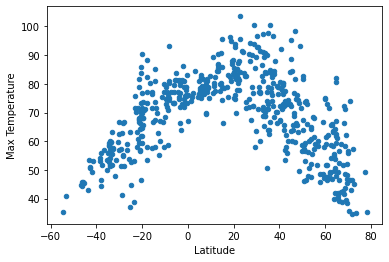

In [10]:
lat_vs_temp = city_stat_pd.plot.scatter(x="Latitude", y="Max Temperature")
plt.show()

In [11]:
#working on it,
lat_vs_humid = city_stat_pd.groupby(city_stat)[['Latitude','Humidity']]
lat_vs_humid.head()

,Latitude,Humidity
0,77.4840,47
1,19.7297,79
2,8.3565,80
3,-34.0527,83
4,-53.1500,93


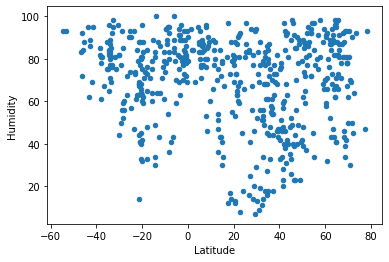

In [12]:
lat_vs_humid = city_stat_pd.plot.scatter(x ='Latitude', y ='Humidity')
plt.show()

In [13]:
#working on it,
lat_vs_cloud = city_stat_pd.groupby(city_stat)[['Latitude','Clouds']]
lat_vs_cloud.head()

,Latitude,Clouds
0,77.4840,100
1,19.7297,28
2,8.3565,61
3,-34.0527,100
4,-53.1500,90


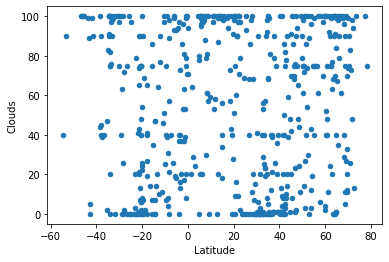

In [14]:
lat_vs_cloud = city_stat_pd.plot.scatter(x='Latitude', y ='Clouds')
plt.show()

In [15]:
lat_vs_wind = city_stat_pd.groupby(city_stat)[['Latitude', 'Wind']]
lat_vs_wind.head()

,Latitude,Wind
0,77.4840,6.13
1,19.7297,3.00
2,8.3565,13.13
3,-34.0527,7.18
4,-53.1500,6.91


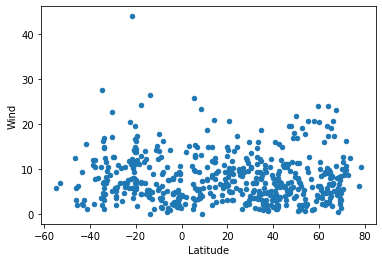

In [16]:
lat_vs_wind = city_stat_pd.plot.scatter(x = 'Latitude', y ='Wind')
plt.show()

In [17]:
#working on it
count = city_stat_pd.groupby(city_stat).count()
mean = city_stat_pd.groupby(city_stat)[['Latitude']].mean()
median = city_stat_pd.groupby(city_stat)[['Latitude']].median()
standard_dv = city_stat_pd.std()
weather_min = city_stat_pd.groupby(city_stat)[['Latitude']].min()
weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
weather_max = city_stat_pd.groupby(city_stat)[['Latitude']].max()
summary_df = pd.DataFrame({"Lat": [city_lat], "Lng": [city_lng], "Max Temp": [city_max_temp],"Humidity": [city_humidity], "Cloudiness": [city_clouds], "Wind Speed": [city_wind], "Date": [city_date]})
summary_df.describe()

    

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1.0000,1.0000,1.00,1.0,1.0,1.00,1.000000e+00
mean,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09
25%,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09
50%,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09
75%,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09
max,41.5284,-87.4237,80.42,59.0,40.0,1.01,1.624482e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
max_humid = city_stat_pd.groupby(city_stat)[['Humidity']].max()
max_humid.head()
#max_humid = max('Humidity')

#print('Max Humidity:', max_humid)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Humidity


In [19]:
#  Get the indices of cities that have humidity over 100%.


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

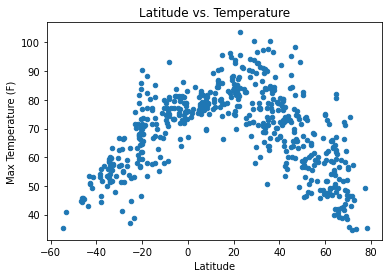

In [32]:
lat_vs_temp = city_stat_pd.plot.scatter(x="Latitude", y="Max Temperature")
plt.title('Latitude vs. Temperature')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

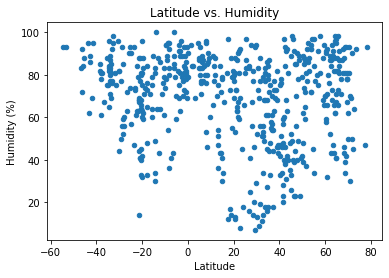

In [34]:
lat_vs_humid = city_stat_pd.plot.scatter(x ='Latitude', y ='Humidity')
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

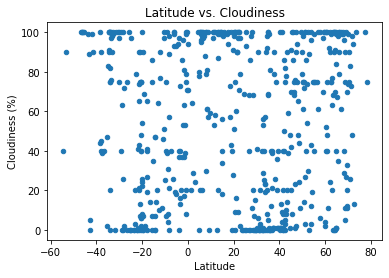

In [35]:
lat_vs_cloud = city_stat_pd.plot.scatter(x='Latitude', y ='Clouds')
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

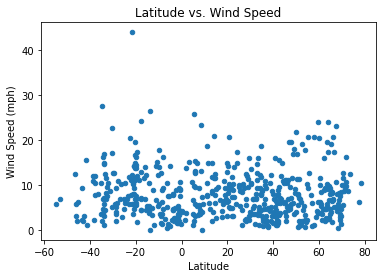

In [36]:
lat_vs_wind = city_stat_pd.plot.scatter(x = 'Latitude', y ='Wind')
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [29]:
north_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]>= 0)]
south_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]< 0)]

In [80]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=18,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49478576635611093


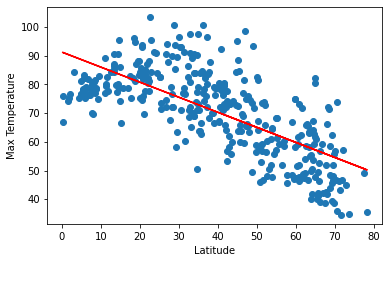

In [81]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6044710746209372


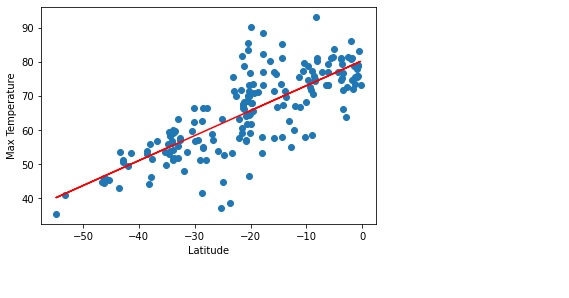

In [82]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00204427539766443


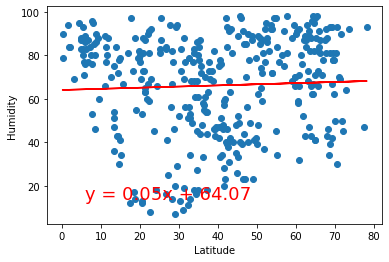

In [83]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0020475268590030202


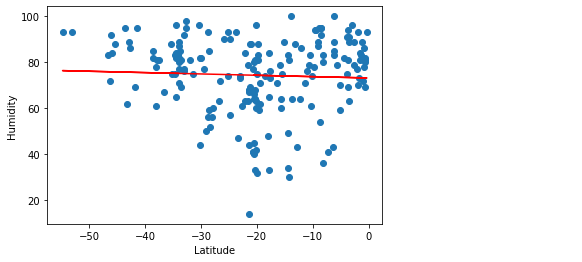

In [84]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 5.058895373518161e-06


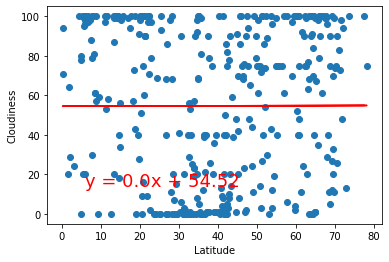

In [85]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03465448517743593


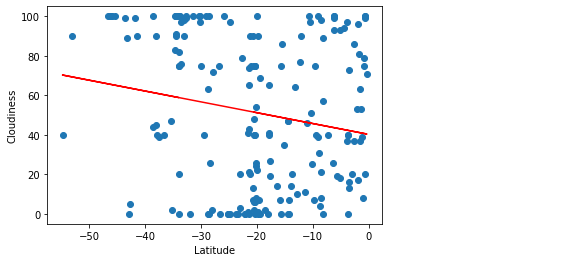

In [86]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0007973758277475321


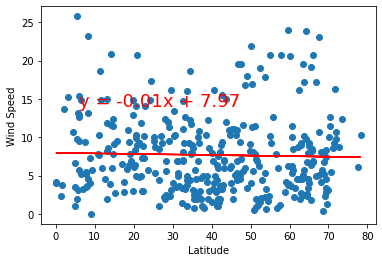

In [87]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0167456745594869


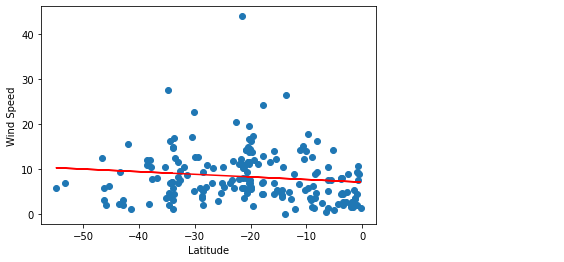

In [88]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()